# Project -  Malaria Detection using Transfer Learning Model  

#### May 15, 2022

In [2]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

2023-11-27 17:59:05.760713: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 17:59:05.840918: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 17:59:05.841477: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 17:59:07.016719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [4]:
i_size=[224,224]

In [5]:
vgg19=VGG19(input_shape=i_size+[3],weights='imagenet', include_top=False)

2023-11-27 17:59:09.116007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 17:59:09.117442: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
for layer in vgg19.layers:
    layer.trainable=False 

In [10]:
folders=glob('Dataset/cell_images/cell_images/*')

In [11]:
folders


['Dataset/cell_images/cell_images/Parasitized',
 'Dataset/cell_images/cell_images/Uninfected']

In [12]:
x=Flatten()(vgg19.output)

In [13]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg19.input , outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
              metrics=['accuracy']
             )

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)


test_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
training_set=train_datagen.flow_from_directory('Dataset/cell_images',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')


Found 27558 images belonging to 2 classes.


In [19]:
training_set

In [23]:
test_set=test_datagen.flow_from_directory('Dataset/test',
                                         target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical'
                                          
                                         )

Found 1059 images belonging to 2 classes.


In [24]:
r=model.fit(training_set,
           validation_data=test_set,
           epochs=2,
           steps_per_epoch = len(training_set),
           validation_steps= len(test_set))

Epoch 1/2


2023-11-27 18:13:41.697814: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2023-11-27 18:13:41.708577: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-11-27 18:13:41.920805: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-11-27 18:13:42.679506: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2023-11-27 18:13:42.766955: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.


862/862 [==============================] - 6293s 7s/step - loss: 0.3695 - accuracy: 0.8414 - val_loss: 0.3504 - val_accuracy: 0.8574
Epoch 2/2
862/862 [==============================] - 6548s 8s/step - loss: 0.2846 - accuracy: 0.8913 - val_loss: 0.2618 - val_accuracy: 0.8914


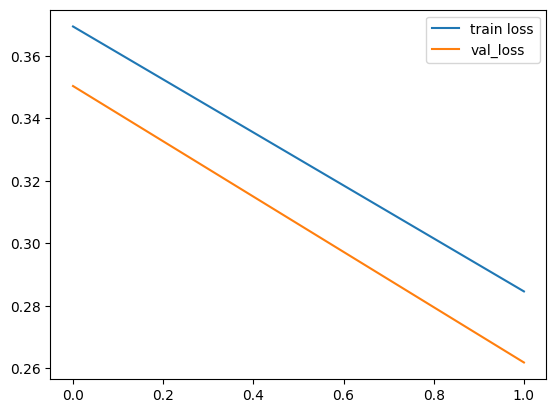

In [25]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


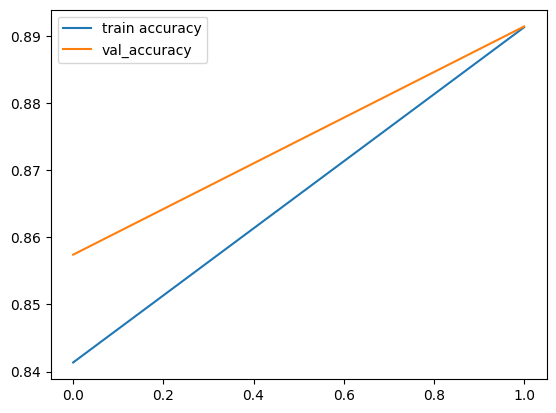

In [26]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [27]:
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

/home/welcome/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
